# Stochastic Test of PrivateClampedSum #

In [2]:
# Preamble: imports and figure settings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

from eeprivacy.operations import PrivateVectorClampedMeanGaussian

np.random.seed(1234)  # Fix seed for deterministic documentation

mpl.style.use("seaborn-white")

MD = 28
LG = 36
plt.rcParams.update(
    {
        "figure.figsize": [25, 10],
        "legend.fontsize": MD,
        "axes.labelsize": LG,
        "axes.titlesize": LG,
        "xtick.labelsize": LG,
        "ytick.labelsize": LG,
    }
)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [4]:
op = PrivateVectorClampedMeanGaussian(
    lower_bound=0, upper_bound=1, k=2, N=1
)
result = op.execute(vectors=[[0, 0]], epsilon=1.0, delta=1e-12)
print(result)

[4.97619096 4.97619096]


100%|██████████| 10000/10000 [00:00<00:00, 16293.15it/s]


Expected mean D 0.0 | Realized mean 0.0025117819088249517
Expected mean D_tilde 1.0 | Realized mean 0.9937089811992577


ValueError: `bins` must be 1d, when an array

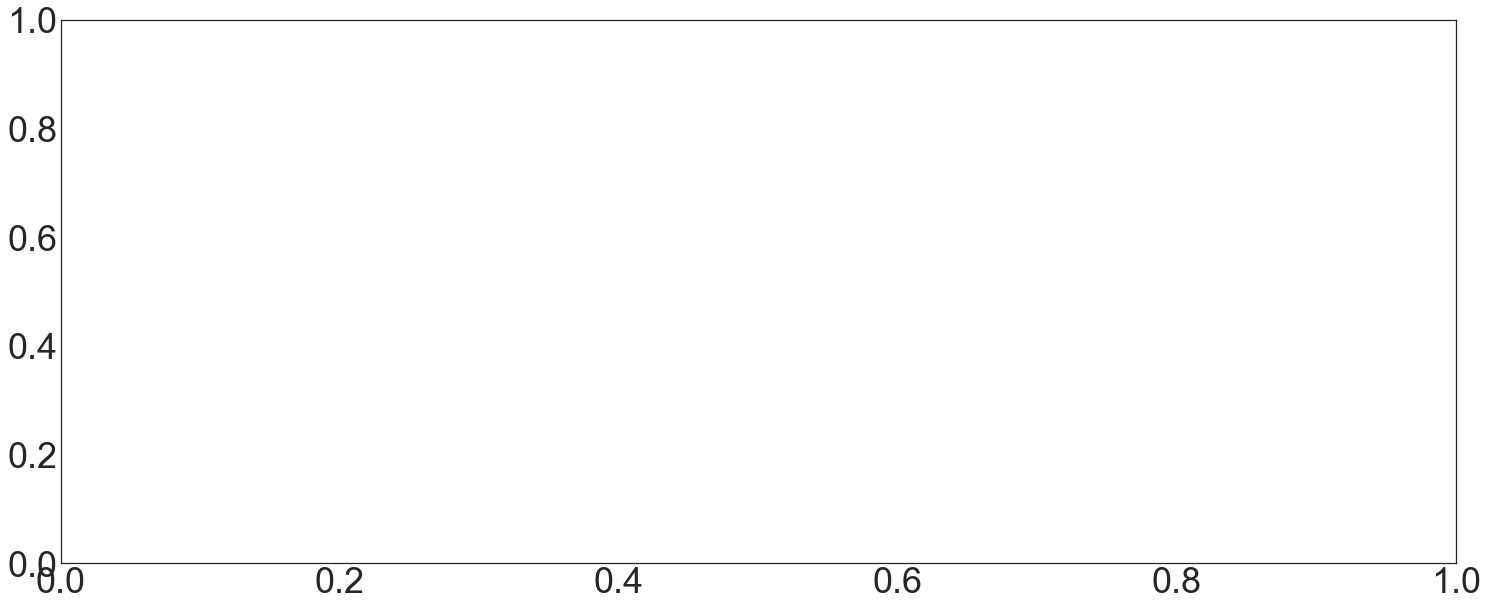

In [3]:
# What does ε bound in the vector case?
# [0, 0] vs [1, 1]
# 2D histogram!
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist2d.html

# Then, how to extend to more dimensions?

def run_stochastic_test(D, D_tilde, k, lower_bound, upper_bound, N, T=1000):
    op = PrivateVectorClampedMeanGaussian(
        lower_bound=lower_bound, upper_bound=upper_bound, k=k, N=N
    )

    epsilon = 1.0
    delta = 1 / N ** 2

    def run_trials(d, trials=1000):
        return [
            op.execute(vectors=d, epsilon=epsilon, delta=delta)
            for _ in tqdm(range(trials))
        ]

    trials = run_trials(D, trials=T)
    trials_tilde = run_trials(D_tilde, trials=T)

    print(f"Expected mean D {np.mean(D)} | Realized mean {np.mean(trials)}")
    print(
        f"Expected mean D_tilde {np.mean(D_tilde)} | Realized mean {np.mean(trials_tilde)}"
    )

    bins = np.linspace(
        min(min(trials), min(trials_tilde)), max(max(trials), max(trials_tilde)), num=30
    )

    plt.hist(trials, bins=bins, alpha=0.5)
    plt.hist(trials_tilde, bins=bins, alpha=0.5)
    plt.show()

    h, _ = np.histogram(trials, bins)
    h_tilde, _ = np.histogram(trials_tilde, bins)

    epsilons = np.log(h / h_tilde)

    plt.plot(epsilons)
    plt.show()


run_stochastic_test([[0]], [[1]], k=1, lower_bound=0, upper_bound=1, N=1, T=10000)

100%|██████████| 10000/10000 [00:00<00:00, 23748.72it/s]


Expected sum D 0 | Realized sum -0.004711665122982089
Expected sum D_tilde 1 | Realized sum 1.0025292629897022


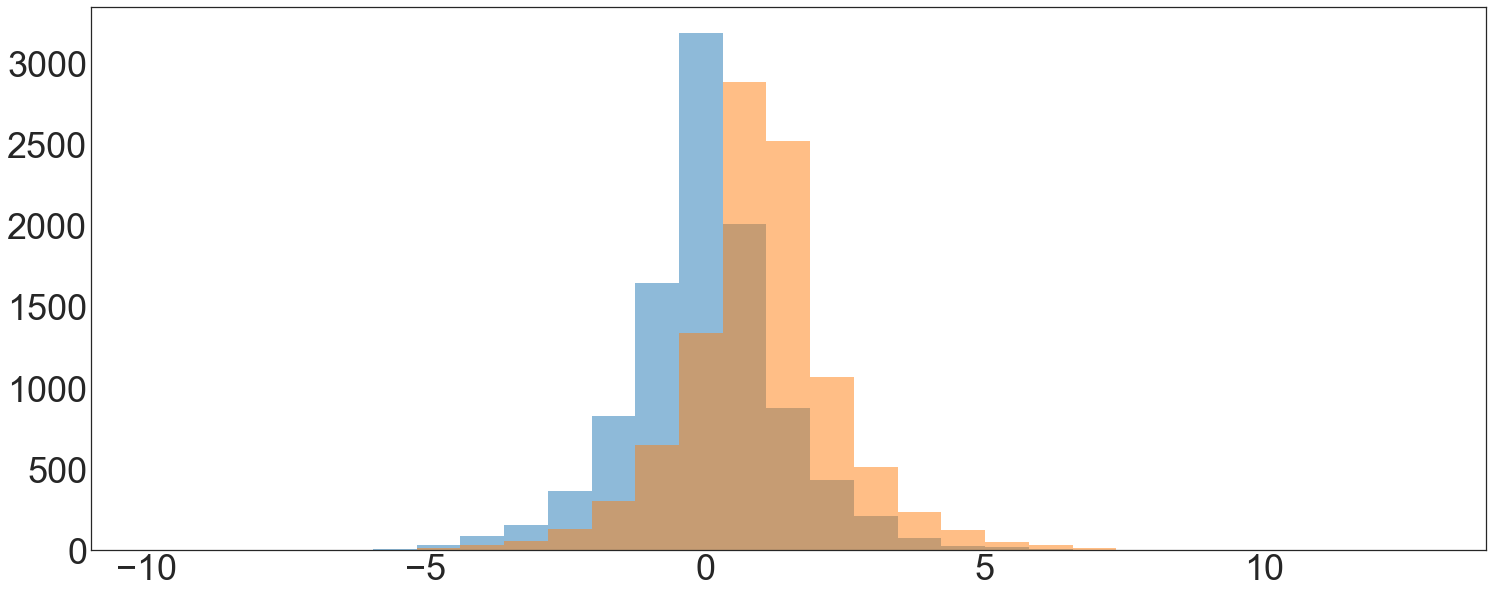

/Users/marc/venvs/eeprivacy/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/marc/venvs/eeprivacy/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/marc/venvs/eeprivacy/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


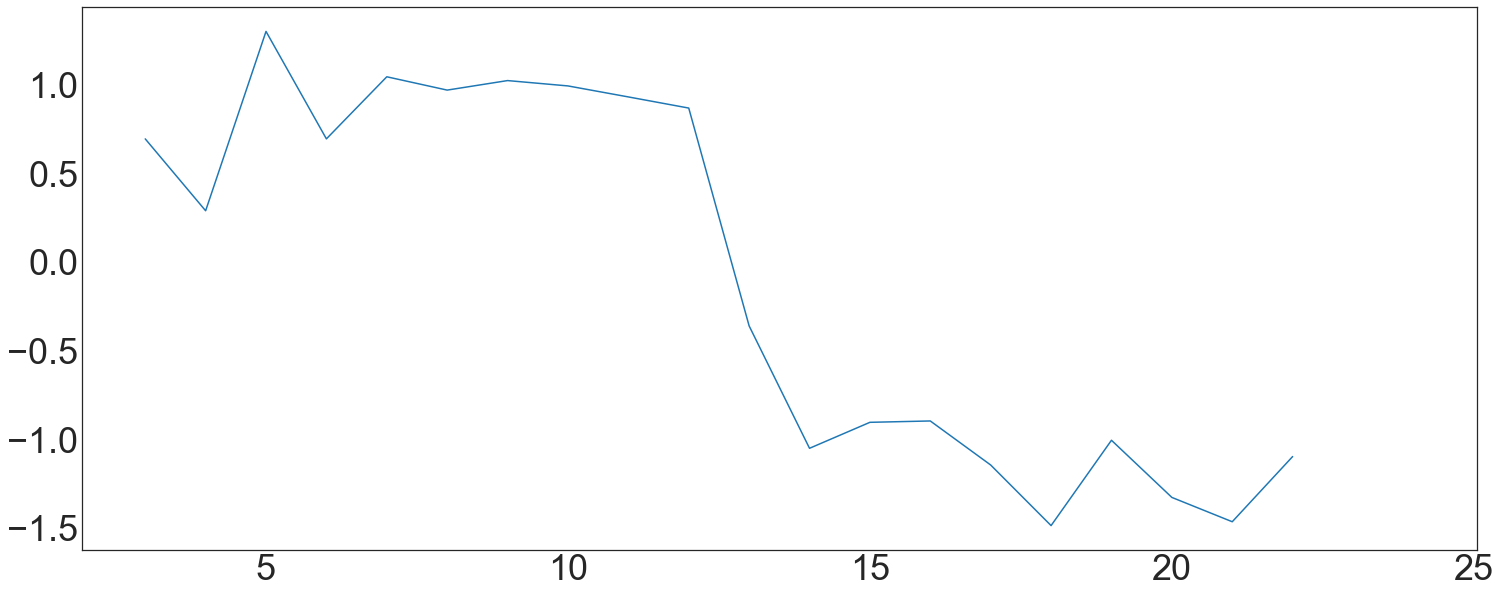

In [3]:
run_stochastic_test([[0]], [[1], k=1, lower_bound=0, upper_bound=1, N=1, T=10000)

100%|██████████| 100000/100000 [00:04<00:00, 24059.89it/s]


Expected sum D 0 | Realized sum -0.0005259901582819642
Expected sum D_tilde 2 | Realized sum 0.9932399539877353


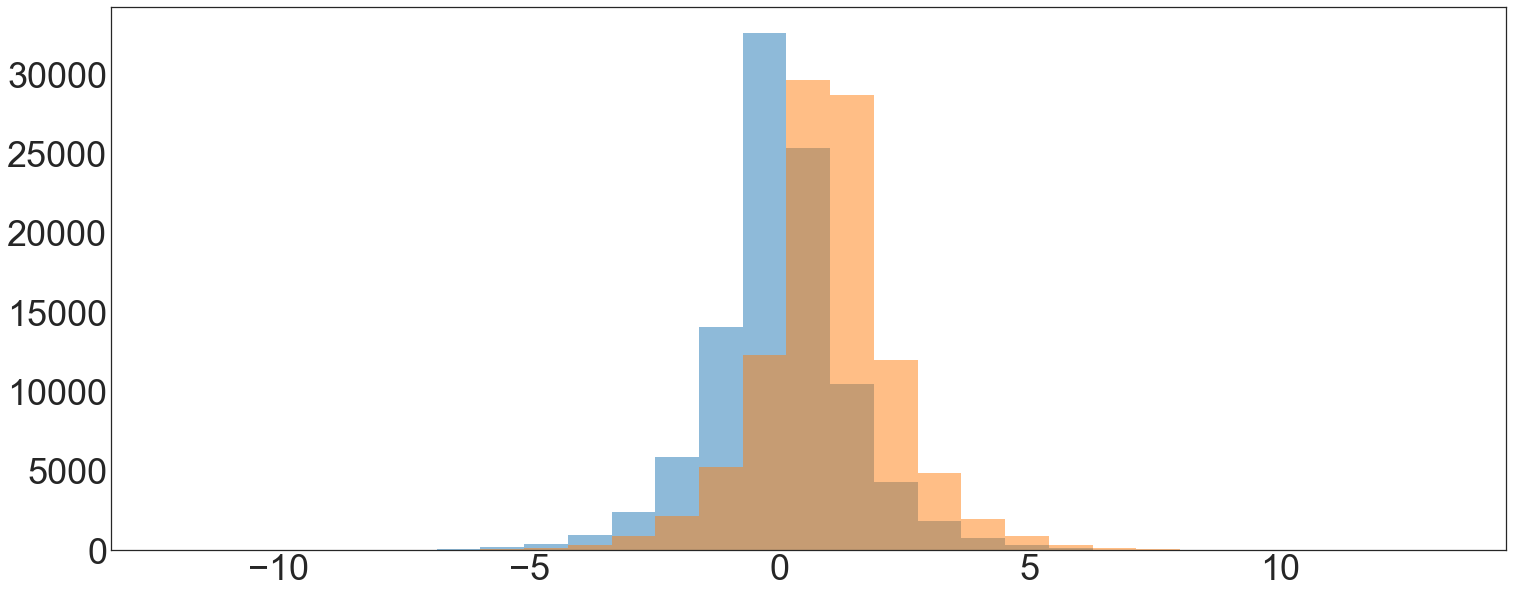

/Users/marc/venvs/eeprivacy/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/marc/venvs/eeprivacy/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


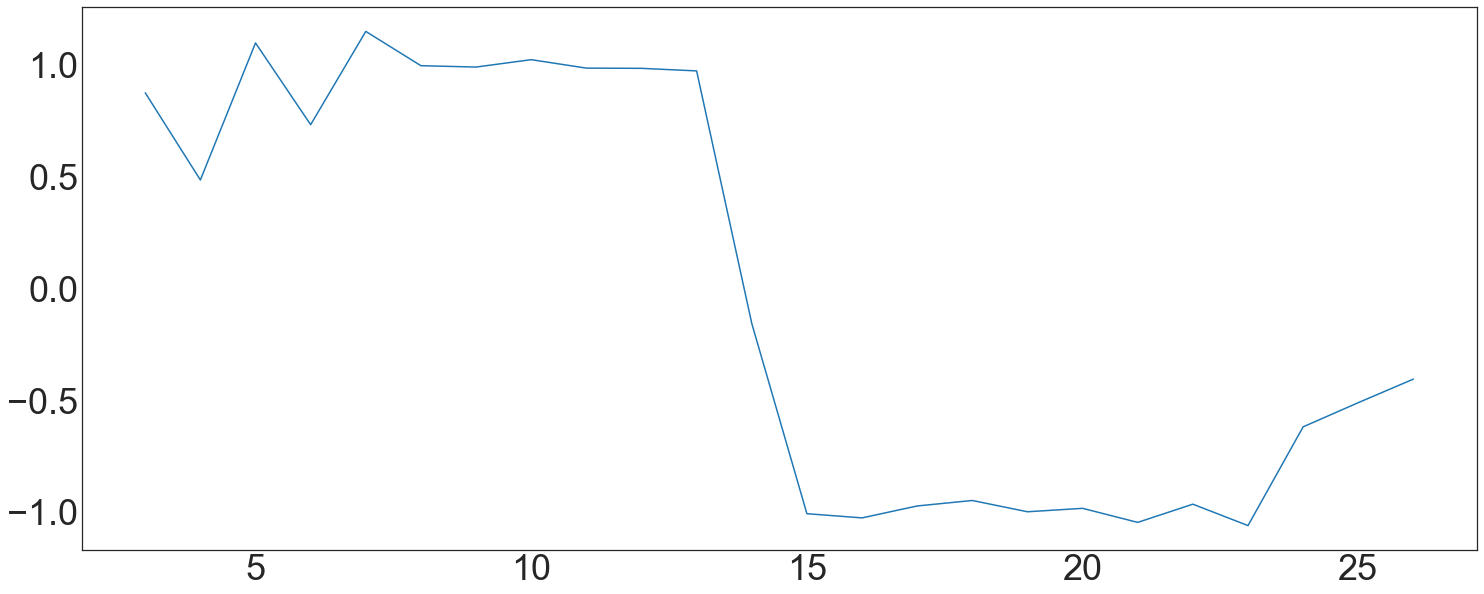

In [4]:
# This will fail is clamping is not being applied
run_stochastic_test([0], [0, 2], lower_bound=0, upper_bound=1, T=100000)